# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier, LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.inspection import DecisionBoundaryDisplay 
#from https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

# Data Wrangling

In [2]:
data = datasets.load_iris()

feature_values = data.data
labels = data.target
classes = data.target_names
features = data.feature_names
sestosas, versicolors, virginicas = np.array([feature_values[0]]),np.array([feature_values[0]]),np.array([feature_values[0]])
for i in range(len(labels)):
    iris_values = feature_values[i]
    if labels[i] == 0: 
        versicolors = np.append(versicolors,[iris_values],axis=0)
    elif labels[i] == 1:
        sestosas = np.append(sestosas,[iris_values],axis=0)
    else:
        virginicas = np.append(virginicas,[iris_values],axis=0)

sestosas = sestosas[1:]
versicolors = versicolors[1:]
virginicas = virginicas[1:]
# The data given in the dataset is categorized into three numpy arrays, one for each class.

In [3]:
XX = np.append(sestosas,versicolors,axis=0)
XX = np.append(XX,virginicas,axis=0)
row,col = sestosas.shape
row1,col1 = versicolors.shape
row2,col2 = virginicas.shape

YY = np.zeros(row)
for i in range(row1):
    YY = np.append(YY,1)
for i in range(row2):
    YY = np.append(YY,2)    
### No change is made on the XX data since all features are taken

# SGD Classifier

In [4]:
SGD_hinge = SGDClassifier(tol=1e-4,random_state=0,loss='hinge')

#Make a copy of the original data
XX1 = np.copy(XX)
YY1 = np.copy(YY)

A = SGD_hinge.fit(XX1,YY1)
A_score = SGD_hinge.score(XX1,YY1)
print('\nScore: ',A_score)
print ('\nnumber of classes ',len(A.classes_),":",classes)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )


Score:  0.72

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            36


In [5]:
SGD_huber = SGDClassifier(tol=1e-4,random_state=0,loss='modified_huber')

#Make a copy of the original data
XX2 = np.copy(XX)
YY2 = np.copy(YY)

B = SGD_huber.fit(XX2,YY2)
B_score = SGD_huber.score(XX2,YY2)
print('\nScore: ',B_score)
print ('\nnumber of classes ',len(B.classes_),":",classes)
print ('n_features_in_    ',B.n_features_in_)
print ('n_iter_           ',B.n_iter_ )


Score:  0.8066666666666666

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            47


# Linear Regression

In [6]:
logistic_reg = LogisticRegression(tol=1e-4,random_state=0,max_iter=1000) 
#Setting the maximum iteration to 1000 will allow the model to continue after 100 iterations

#Make a copy of the original data
XX3 = np.copy(XX)
YY3 = np.copy(YY)

C = logistic_reg.fit(XX3,YY3)
C_score = logistic_reg.score(XX3,YY3)
print('\nScore: ',C_score)
print ('\nnumber of classes ',len(C.classes_),":",classes)
print ('n_features_in_    ',C.n_features_in_)
print ('n_iter_           ',C.n_iter_ )


Score:  0.9733333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            [115]


# Support Vector Machine

In [7]:
support_vector_linear = SVC(kernel='linear')

#Make a copy of the original data
XX4 = np.copy(XX)
YY4 = np.copy(YY)

D = support_vector_linear.fit(XX4,YY4)
D_score = support_vector_linear.score(XX4,YY4)
print('\nScore: ',D_score)
print ('\nnumber of classes ',len(D.classes_),":",classes)
print ('n_features_in_    ',D.n_features_in_)
print ('n_iter_           ',D.n_iter_ )


Score:  0.9933333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            [13 31  3]


In [8]:
support_vector_poly = SVC(kernel='poly')

#Make a copy of the original data
XX5 = np.copy(XX)
YY5 = np.copy(YY)

E = support_vector_poly.fit(XX5,YY5)
E_score = support_vector_poly.score(XX5,YY5)
print('\nScore: ',E_score)
print ('\nnumber of classes ',len(E.classes_),":",classes)
print ('n_features_in_    ',E.n_features_in_)
print ('n_iter_           ',E.n_iter_ )


Score:  0.9733333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            [ 8 40 10]


In [9]:
support_vector_rbf = SVC(kernel='rbf')

#Make a copy of the original data
XX6 = np.copy(XX)
YY6 = np.copy(YY)

F = support_vector_rbf.fit(XX6,YY6)
F_score = support_vector_rbf.score(XX6,YY6)
print('\nScore: ',F_score)
print ('\nnumber of classes ',len(F.classes_),":",classes)
print ('n_features_in_    ',F.n_features_in_)
print ('n_iter_           ',F.n_iter_ )


Score:  0.9733333333333334

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4
n_iter_            [ 7 37 17]


# Desicion Tree


Score:  0.9933333333333333

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4


[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 0, 50]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [49, 0, 5]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [47, 0, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [1, 0, 45]'),
 Text(0.7692307692307693, 0.3, 'x[0] <

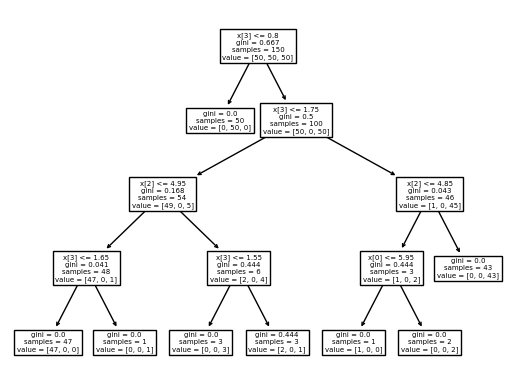

In [10]:
tree_depth4 = DecisionTreeClassifier(random_state=0, max_depth=4)

#Make a copy of the original data
XX7 = np.copy(XX)
YY7 = np.copy(YY)

G = tree_depth4.fit(XX7,YY7)
G_score = tree_depth4.score(XX7,YY7)
print('\nScore: ',G_score)
print ('\nnumber of classes ',len(G.classes_),":",classes)
print ('n_features_in_    ',G.n_features_in_)
plot_tree(tree_depth4)


Score:  1.0

number of classes  3 : ['setosa' 'versicolor' 'virginica']
n_features_in_     4


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 0, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [49, 0, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [47, 0, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

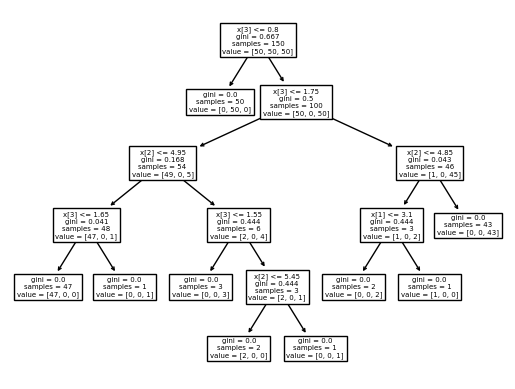

In [11]:
tree_depth8 = DecisionTreeClassifier(random_state=0, max_depth=8)

#Make a copy of the original data
XX8 = np.copy(XX)
YY8 = np.copy(YY)

H = tree_depth8.fit(XX8,YY8)
H_score = tree_depth8.score(XX8,YY8)
print('\nScore: ',H_score)
print ('\nnumber of classes ',len(H.classes_),":",classes)
print ('n_features_in_    ',H.n_features_in_)
plot_tree(tree_depth8)

# Results

(0.0, 1.0)

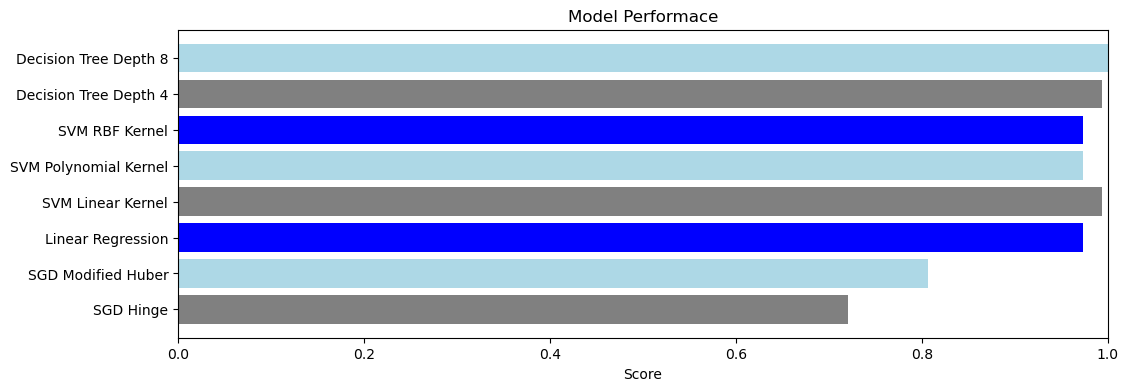

In [12]:
x_names = ["SGD Hinge", "SGD Modified Huber", "Linear Regression", "SVM Linear Kernel", "SVM Polynomial Kernel", "SVM RBF Kernel","Decision Tree Depth 4","Decision Tree Depth 8"]
y_percentages = [A_score,B_score,C_score,D_score,E_score,F_score,G_score,H_score]
plt.figure(figsize=(12,4))
plt.barh(x_names,y_percentages, color=['gray','lightblue','blue'])
plt.title("Model Performace")
plt.xlabel("Score")
plt.xlim(0,1)

The table above shows the performace of each model using the same data from the Iris dataset. A total of 4 features were used in the following models:
- Stochastic gradient descent using the hinge loss function.
- Stochastic gradient descent using modified the huber loss function.
- Logistic regression.
- Support vector machine using a linear kernel.
- Support vector machine using a polynomial kernel.
- Support vector machine using a rbf kernel.
- Decision Tree using gini to measure the impurity and a maximum tree depth of 4.
- Decision Tree using gini to measure the impurity and a maximum tree depth of 8.

The Modified Huber loss function performs slighlty better than Hinge. The results demonstrate that other models outprerform the SGD classifier by around 30-40%.

The Decision tree with a depth of 8 reaches the 100% accuracy score, however, it's very likely that it's overfitting the data and if tested with new points the tree will not reach the same level; the same can be said about the desicion tree with a depth 4.


The support vector machine with a linear kerne performs slightly better than the other kernels. This could possibly happen because the data can be better classified using linear desicion boundaries.